In [20]:
import pandas as pd

# Öffnen der CSV-Datei mit dem richtigen Trennzeichen und der richtigen Kodierung
data = pd.read_csv('PKS2023.csv', encoding='latin-1', delimiter=';', skiprows=[0,2], usecols=[0,1, 15, 18])

data['Jahr']= 2023

col_enum = list(enumerate(data.iloc[:, 0], start=1))

print(data.columns)
#print(col_enum)

Index(['Schluessel', 'Straftat', 'Tatverdaechtige insgesamt',
       'Anzahl nichtdeutsche Tatverdaechtige', 'Jahr'],
      dtype='object')


In [5]:
print(data)

     Schluessel                                           Straftat  \
0             0                         Straftaten gegen das Leben   
1         10000                                   Mord § 211 StGB    
2         10079                                     Sonstiger Mord   
3         11000              Mord im Zusammenhang mit Raubdelikten   
4         12000            Mord im Zusammenhang mit Sexualdelikten   
...         ...                                                ...   
1132     973060  Amphetamin und seine Derivate in Pulver- oder ...   
1133     973070  Methamphetamin in Pulver-, kristalliner oder f...   
1134     973080                         Cannabis und Zubereitungen   
1135     973090                          Sonstige Betäubungsmittel   
1136     973172  Crystal -Methamphetamin in kristalliner Form- ...   

     Tatverdaechtige insgesamt Anzahl nichtdeutsche Tatverdaechtige  Jahr  
0                        3,735                                1,418  2023  
1      

In [21]:
#Es sollen nur bestimmte Delikte ausgewählt werden
valid_schluessel = ['0', '100000', '200000' ,'3***00', '4***00','****00','500000']
filtered_data_2023 = data[data['Schluessel'].isin(valid_schluessel)]

# Konvertiere die Spalten 'Tatverdaechtige insgesamt' und 'Anzahl nichtdeutsche Tatverdaechtige' in numerische Werte
filtered_data_2023.loc[:, 'Tatverdaechtige insgesamt'] = filtered_data_2023['Tatverdaechtige insgesamt'].str.replace(',', '').astype(float)
filtered_data_2023.loc[:, 'Anzahl nichtdeutsche Tatverdaechtige'] = filtered_data_2023['Anzahl nichtdeutsche Tatverdaechtige'].str.replace(',', '').astype(float)

# Hinzufügen einer neuen Spalte, die das Verhältnis berechnet
filtered_data_2023.loc[:, 'Anteil nichtdeutsche Tatverdaechtige'] = filtered_data_2023['Anzahl nichtdeutsche Tatverdaechtige'] / filtered_data_2023['Tatverdaechtige insgesamt']

print(filtered_data_2023)


    Schluessel                                           Straftat  \
0            0                         Straftaten gegen das Leben   
15      100000  Straftaten gegen die sexuelle Selbstbestimmung...   
99      200000  Rohheitsdelikte und Straftaten gegen die persö...   
237     3***00  Diebstahl ohne erschwerende Umstände §§ 242, 2...   
307     4***00  Diebstahl unter erschwerenden Umständen §§ 243...   
452     ****00                      Diebstahl insgesamt und zwar:   
475     500000                   Vermögens- und Fälschungsdelikte   

    Tatverdaechtige insgesamt Anzahl nichtdeutsche Tatverdaechtige  Jahr  \
0                      3735.0                               1418.0  2023   
15                    93707.0                              26591.0  2023   
99                   681534.0                             231695.0  2023   
237                  374719.0                             162592.0  2023   
307                   81140.0                              41678.0 

C:\Users\schwa\AppData\Local\Temp\ipykernel_5264\1990880078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023.loc[:, 'Anteil nichtdeutsche Tatverdaechtige'] = filtered_data_2023['Anzahl nichtdeutsche Tatverdaechtige'] / filtered_data_2023['Tatverdaechtige insgesamt']


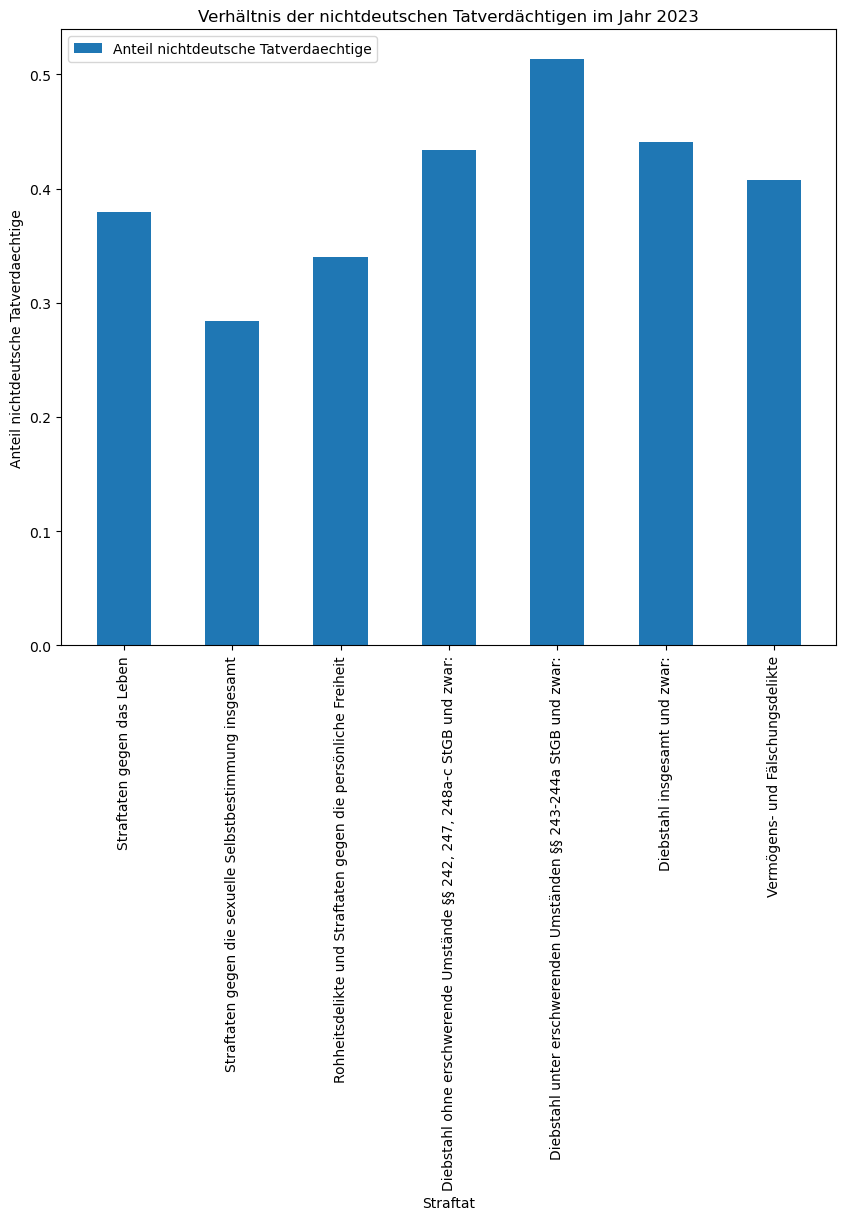

In [22]:
import matplotlib.pyplot as plt

# Vorbereitung der Daten für das Balkendiagramm
labels = filtered_data_2023['Straftat']
total = filtered_data_2023['Anteil nichtdeutsche Tatverdaechtige']
non_german = filtered_data_2023['Anzahl nichtdeutsche Tatverdaechtige']

# Erstellen des gestapelten Balkendiagramms
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.5

# Balken für den Anteil nichtdeutscher Tatverdächtiger
bars_non_german = ax.bar(labels, total, bar_width, label='Anteil nichtdeutsche Tatverdaechtige')

# Hinzufügen von Titeln und Labels
ax.set_xlabel('Straftat')
ax.set_ylabel('Anteil nichtdeutsche Tatverdaechtige')
ax.set_title('Verhältnis der nichtdeutschen Tatverdächtigen im Jahr 2023')
ax.legend()

# Rotieren der x-Achsen-Ticks für bessere Lesbarkeit
plt.xticks(rotation=90)

# Diagramm anzeigen
plt.show()


In [23]:
# Öffnen der CSV-Datei mit dem richtigen Trennzeichen und der richtigen Kodierung für das Jahr 2022
data_2022 = pd.read_csv('PKS2022.csv', encoding='latin-1', delimiter=';', skiprows=[0, 2], usecols=[0, 1, 15, 18])

# Benenne die Spalten entsprechend der Datenstruktur
data_2022.columns = ['Schluessel', 'Straftat', 'Tatverdaechtige insgesamt', 'Anzahl nichtdeutsche Tatverdaechtige']

# Hinzufügen einer neuen Spalte 'Jahr' mit dem Wert 2022
data_2022['Jahr'] = 2022

# Definiere die gültigen Schlüssel
valid_schluessel = ['0', '100000', '200000', '3***00', '4***00', '****00', '500000']

# Filtere den DataFrame nach diesen Schlüsseln in der Spalte "Schluessel"
filtered_data_2022 = data_2022[data_2022['Schluessel'].isin(valid_schluessel)].copy()

# Konvertiere die Spalten 'Tatverdaechtige insgesamt' und 'Anzahl nichtdeutsche Tatverdaechtige' in numerische Werte
filtered_data_2022['Tatverdaechtige insgesamt'] = filtered_data_2022['Tatverdaechtige insgesamt'].str.replace(',', '').astype(float)
filtered_data_2022['Anzahl nichtdeutsche Tatverdaechtige'] = filtered_data_2022['Anzahl nichtdeutsche Tatverdaechtige'].str.replace(',', '').astype(float)

# Hinzufügen einer neuen Spalte, die das Verhältnis berechnet
filtered_data_2022['Anteil nichtdeutsche Tatverdaechtige'] = filtered_data_2022['Anzahl nichtdeutsche Tatverdaechtige'] / filtered_data_2022['Tatverdaechtige insgesamt']

# Zeige die ersten Zeilen des DataFrames an, um sicherzustellen, dass alles korrekt eingelesen und bearbeitet wurde
print(filtered_data_2022.head())


    Schluessel                                           Straftat  \
0            0                         Straftaten gegen das Leben   
16      100000  Straftaten gegen die sexuelle Selbstbestimmung...   
100     200000  Rohheitsdelikte und Straftaten gegen die persö...   
238     3***00  Diebstahl ohne erschwerende Umstände §§ 242, 2...   
308     4***00  Diebstahl unter erschwerenden Umständen §§ 243...   

     Tatverdaechtige insgesamt  Anzahl nichtdeutsche Tatverdaechtige  Jahr  \
0                       3539.0                                1270.0  2022   
16                     88730.0                               23637.0  2022   
100                   634596.0                              203799.0  2022   
238                   326629.0                              130980.0  2022   
308                    73374.0                               34790.0  2022   

     Anteil nichtdeutsche Tatverdaechtige  
0                                0.358858  
16                          

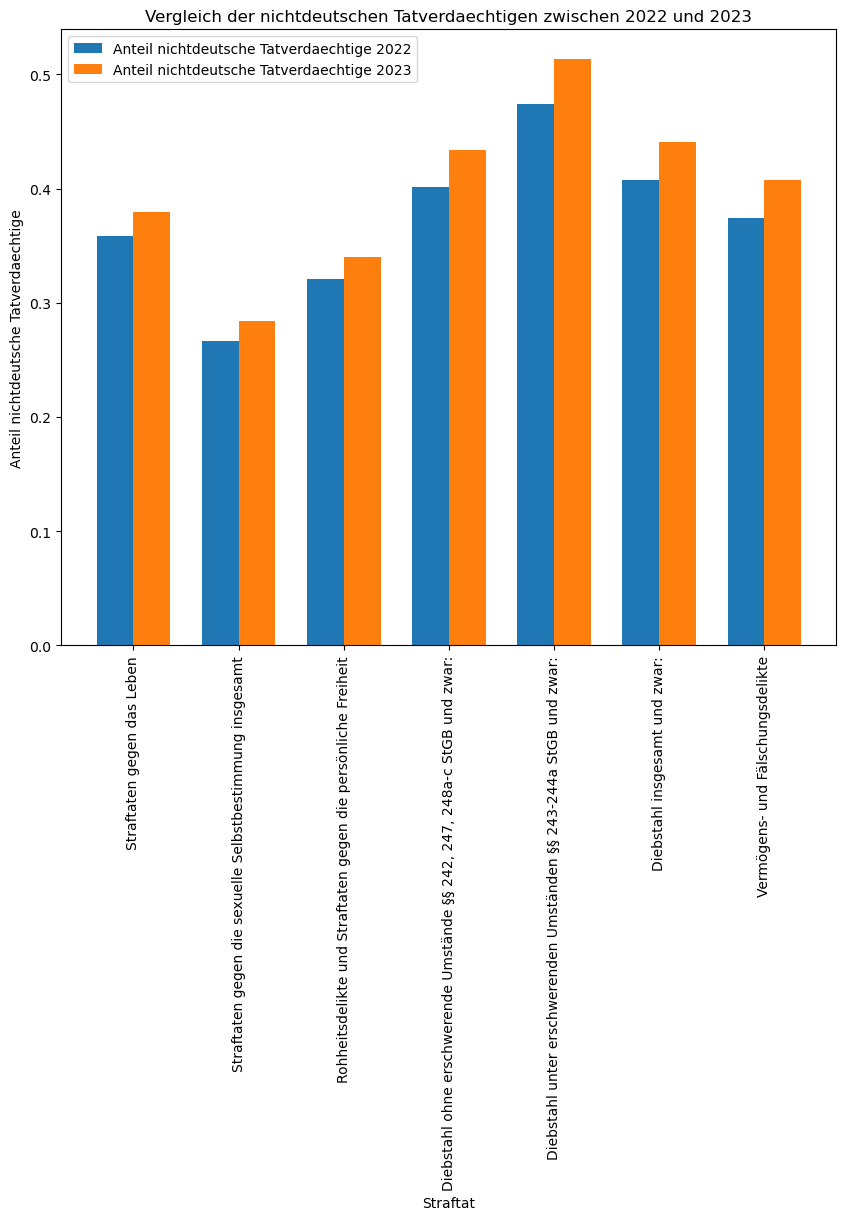

In [25]:
# Vorbereitung der Daten für das Balkendiagramm für beide Jahre
labels = filtered_data_2023['Straftat']
total_2023 = filtered_data_2023['Anteil nichtdeutsche Tatverdaechtige']
total_2022 = filtered_data_2022['Anteil nichtdeutsche Tatverdaechtige']

# Erstellen des gestapelten Balkendiagramms
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
index = range(len(labels))

# Balken für das Jahr 2023
bars_2022 = ax.bar(index, total_2022, bar_width, label='Anteil nichtdeutsche Tatverdaechtige 2022')

# Balken für das Jahr 2022
bars_2023 = ax.bar([i + bar_width for i in index], total_2023, bar_width, label='Anteil nichtdeutsche Tatverdaechtige 2023')

# Hinzufügen von Titeln und Labels
ax.set_xlabel('Straftat')
ax.set_ylabel('Anteil nichtdeutsche Tatverdaechtige')
ax.set_title('Vergleich der nichtdeutschen Tatverdaechtigen zwischen 2022 und 2023')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Diagramm anzeigen
plt.show()